In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D

WT_COL='darkblue'
D7_COL='royalblue'

D4_COL = 'red'
D12_COL = 'orange'

In [13]:
np.arange(0.6,0.75,0.025)

array([0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 ])

In [14]:
np.arange(0.75,0.9,0.025)

array([0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  ])

In [16]:
np.arange(0.9,1.1+0.025,0.025)

array([0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ])

### FULL ROUTINE

### 12D - D4

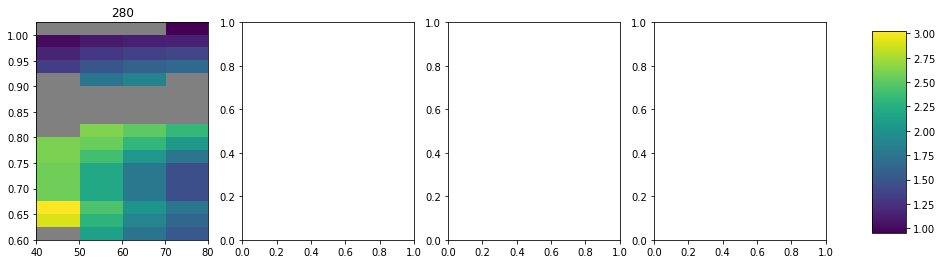

In [45]:
# ls=["1.0","0.8", "0.75", "0.7", "0.6"]
# ls=["1.0","0.8", "0.75", "0.6"]
ts = np.linspace(280,400,8)
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
c=0
for T in [0]:
    ls=["1.0","0.8", "0.75"]
    data = []
    for l in ls:
        if len(data) == 0:
            data = np.genfromtxt(f'/home/adria/scripts/md/bin/d12-d4/rw_{l}_HPST-{T}.txt', skip_header=2)
        else:
            test = np.genfromtxt(f'/home/adria/scripts/md/bin/d12-d4/rw_{l}_HPST-{T}.txt', skip_header=2)
            data = np.concatenate([data, test])

    ls = np.flip(np.unique(data[:,0]))
    eps = np.flip(np.unique(data[:,1]))

    rw = pd.DataFrame(index=eps, columns=ls)
    rw = rw.astype('float64')
    neff_rw = pd.DataFrame(np.random.randint(0,10,size=(len(eps), len(ls))), index=eps, columns=ls)
    neff_rw = neff_rw.astype('float64')

    for row in data:
        l = row[0]
        e = row[1]
        diff = row[2]
        neff = row[3]
        neff = row[4]
        rw[l][e] = diff.astype(float)
        neff_rw[l][e] = neff    

    cut = 0.3
    mask = rw
    mask.values[np.where(neff_rw.values<cut)] = np.nan
    
    cmap = plt.get_cmap()
    cmap.set_bad(color = 'grey', alpha = 1.)
    img = axs[c].pcolormesh(eps,ls,rw.T, cmap=cmap)
    axs[c].set_title(f"{ts[c]:.0f}")
    c+=1
    
fig.subplots_adjust(right=0.81)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(img, cax=cbar_ax)

### 7D - WT

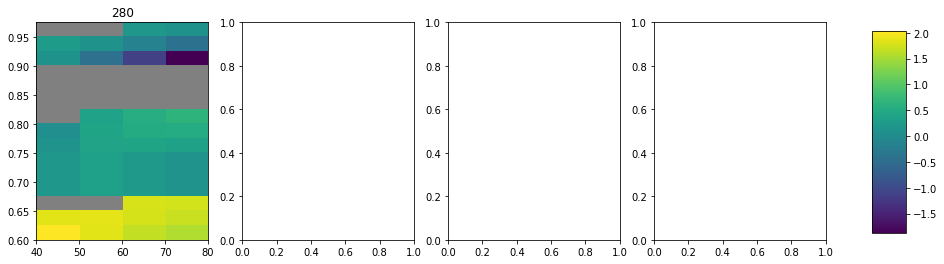

In [41]:
# ls=["1.0","0.8", "0.75", "0.7", "0.6"]
# ls=["1.0","0.8", "0.75", "0.6"]
ts = np.linspace(280,400,8)
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
c=0
for T in [0]:
    ls=["1.0","0.8", "0.75"]
    data = []
    for l in ls:
        if len(data) == 0:
            data = np.genfromtxt(f'/home/adria/scripts/md/bin/d7-wt/rw_{l}_HPST-{T}.txt', skip_header=2)
        else:
            test = np.genfromtxt(f'/home/adria/scripts/md/bin/d7-wt/rw_{l}_HPST-{T}.txt', skip_header=2)
            data = np.concatenate([data, test])

    ls = np.flip(np.unique(data[:,0]))
    eps = np.flip(np.unique(data[:,1]))

    rw = pd.DataFrame(index=eps, columns=ls)
    rw = rw.astype('float64')
    neff_rw = pd.DataFrame(np.random.randint(0,10,size=(len(eps), len(ls))), index=eps, columns=ls)
    neff_rw = neff_rw.astype('float64')

    for row in data:
        l = row[0]
        e = row[1]
        diff = row[2]
        neff = row[3]
        neff = row[4]
        rw[l][e] = diff.astype(float)
        neff_rw[l][e] = neff    

    cut = 0.2
    mask = rw
    mask.values[np.where(neff_rw.values<cut)] = np.nan
    
    cmap = plt.get_cmap()
    cmap.set_bad(color = 'grey', alpha = 1.)
    img = axs[c].pcolormesh(eps,ls,rw.T, cmap=cmap)
    axs[c].set_title(f"{ts[c]:.0f}")
    c+=1
    
fig.subplots_adjust(right=0.81)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(img, cax=cbar_ax)

### WT - E4

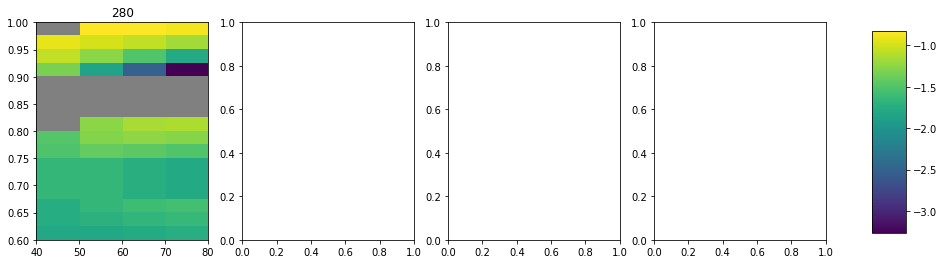

In [39]:
# ls=["1.0","0.8", "0.75", "0.7", "0.6"]
# ls=["1.0","0.8", "0.75", "0.6"]
ts = np.linspace(280,400,8)
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
c=0
for T in [0]:
    ls=["1.0","0.8", "0.75"]
    data = []
    for l in ls:
        if len(data) == 0:
            data = np.genfromtxt(f'/home/adria/scripts/md/bin/wt-d4/rw_{l}_HPST-{T}.txt', skip_header=2)
        else:
            test = np.genfromtxt(f'/home/adria/scripts/md/bin/wt-d4/rw_{l}_HPST-{T}.txt', skip_header=2)
            data = np.concatenate([data, test])

    ls = np.flip(np.unique(data[:,0]))
    eps = np.flip(np.unique(data[:,1]))

    rw = pd.DataFrame(index=eps, columns=ls)
    rw = rw.astype('float64')
    neff_rw = pd.DataFrame(np.random.randint(0,10,size=(len(eps), len(ls))), index=eps, columns=ls)
    neff_rw = neff_rw.astype('float64')

    for row in data:
        l = row[0]
        e = row[1]
        diff = row[2]
        neff = row[3]
        neff = row[4]
        rw[l][e] = diff.astype(float)
        neff_rw[l][e] = neff    

    cut = 0.2
    mask = rw
    mask.values[np.where(neff_rw.values<cut)] = np.nan
    
    cmap = plt.get_cmap()
    cmap.set_bad(color = 'grey', alpha = 1.)
    img = axs[c].pcolormesh(eps,ls,rw.T, cmap=cmap)
    axs[c].set_title(f"{ts[c]:.0f}")
    c+=1
    
fig.subplots_adjust(right=0.81)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(img, cax=cbar_ax)

### 0.75 eps only

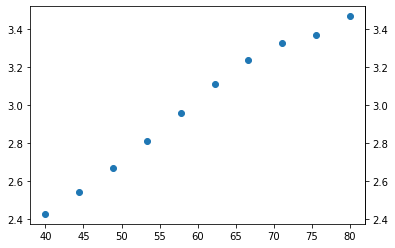

In [26]:
c=0
fig, ax = plt.subplots()
for T in range(0,1):
    ls=["0.75"]
    data = []
    for l in ls:
        if len(data) == 0:
            data = np.genfromtxt(f'/home/adria/rw_results_eps/rw_{l}_HPST-{T}.txt', skip_header=2)
        else:
            test = np.genfromtxt(f'/home/adria/rw_results_eps/rw_{l}_HPST-{T}.txt', skip_header=2)
            data = np.concatenate([data, test])
    ls = np.flip(np.unique(data[:,0]))
    eps = np.flip(np.unique(data[:,1]))
    ax.plot(np.flip(data[:,1]), data[:,2],'o')
    secaxy = ax.secondary_yaxis('right')
    secaxy.plot()

#     plt.plot(np.flip(data[:,1]), data[:,2],'o')
    


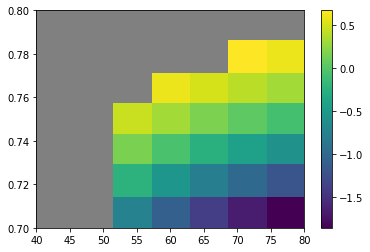

In [150]:
# ls=["1.0","0.8", "0.75", "0.7", "0.6"]
# ls=["1.0","0.8", "0.75", "0.6"]

# fig, axs = plt.subplots(1, 4, figsize=(16, 4))
c=0
for T in range(3,4):
    ls=["0.75"]
    data = []
    for l in ls:
        if len(data) == 0:
            data = np.genfromtxt(f'/home/adria/rw_results3/rw_{l}_HPST-{T}.txt', skip_header=2)
        else:
            test = np.genfromtxt(f'/home/adria/rw_results3/rw_{l}_HPST-{T}.txt', skip_header=2)
            data = np.concatenate([data, test])

    ls = np.flip(np.unique(data[:,0]))
    eps = np.flip(np.unique(data[:,1]))

    rw = pd.DataFrame(np.random.randint(0,10,size=(len(eps), len(ls))), index=eps, columns=ls)
    rw = rw.astype('float64')
    neff_rw = pd.DataFrame(np.random.randint(0,10,size=(len(eps), len(ls))), index=eps, columns=ls)
    neff_rw = neff_rw.astype('float64')

    for row in data:
        l = row[0]
        e = row[1]
        diff = row[2]
        neff = row[3]
        neff = row[4]
        rw[l][e] = diff.astype(float)
        neff_rw[l][e] = neff    

    cut = 0.6
    mask = rw
    mask.values[np.where(neff_rw.values<cut)] = np.nan
    
    cmap = plt.get_cmap()
    cmap.set_bad(color = 'grey', alpha = 1.)
    # img = plt.pcolor(ls,eps,rw)
    img = plt.pcolormesh(eps,ls,rw.T, cmap=cmap)
    plt.colorbar(img)
    c+=1
    
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(img, cax=cbar_ax)